# razvoj prebačen na vs code zbog pyqt5

In [1]:
%run uvod.ipynb

<Figure size 2000x2000 with 0 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

<Figure size 500x500 with 1 Axes>

In [2]:
def generisi_pol(izl,p):
    r = []
    for i in izl:
        q =affine_h(p,i)
        x,y = q.exterior.coords[0] 
        if(x<4 and x>-4 and y<4 and y>-4):
            r.append(q)
    return r

In [3]:
sve_slike = []

In [4]:
def T(A):
    return (A.x,A.y)

In [5]:
def generisi_t(izl,p):
    r = []
    for i in izl:
        q =affine_h(p,i)
        x,y = q.x,q.y
        if(x<4 and x>-4 and y<4 and y>-4):
            r.append(q)
    return r

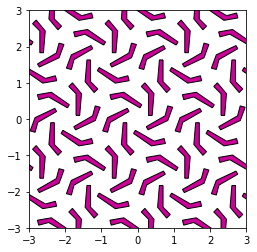

In [96]:
#pol = Polygon([(0.25,0.1),(0.45, 0.1), (0.45,1), (0.25,1)])
#pol = Polygon([(0.4,0.05),(0.9, 0.15),(0.7,0.7), (0.3,0.4)])
#pol = Polygon([(0.4,0.1),(0.5, 0.1), (0.6,0.7),(0.3,1), (0.2,0.9),(0.4,0.7)])
#pol =dopuni(izomgen,pol)
pol = Polygon([(0.3,0.1),(0.4, 0.1), (0.45,0.7),(0.2,1), (0.1,0.9),(0.3,0.7)])
#pol = Polygon([(0.3,0.4),(0.35, 0.4), (0.4,0.7),(0.7,0.8), (0.8,0.9),(0.3,0.9)])
tr = Polygon([(0,0),(2, 0), (1,0.58)])
rec1 = Polygon([(0,0.02),(1, 0.02), (1,2), (0,2)])
izomgen = izomgen_p6
xmin,xmax,ymin,ymax = (-3,3,-3,3)
okvir = [-3,3,-3,3]
bx = plt.axes()  
bx.set_xlim(xmin,xmax)
bx.set_xticks(range(xmin,xmax+1))
bx.set_ylim(ymin,ymax)
bx.set_yticks(range(ymin,ymax+1))
bx.set_aspect(1)
#crtaj(izomgen,tr,bx,'#00FFFF')

crtaj(izomgen,pol,bx,'#CC0099', 1)
#crtaj([I],pol,bx,'#CC0099', 1)
plt.show()

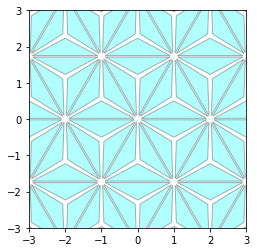

In [55]:
bx = plt.axes()  
bx.set_xlim(xmin,xmax)
bx.set_xticks(range(xmin,xmax+1))
bx.set_ylim(ymin,ymax)
bx.set_yticks(range(ymin,ymax+1))
bx.set_aspect(1)
crtaj(izomgen,tr,bx,'#00FFFF')

plt.show()

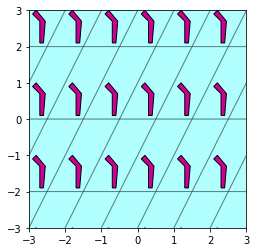

In [90]:
rec2 = Polygon([(0.5,0),(1.5, 0), (2.5,2), (1.5,2)])
bx = plt.axes()  
bx.set_xlim(xmin,xmax)
bx.set_xticks(range(xmin,xmax+1))
bx.set_ylim(ymin,ymax)
bx.set_yticks(range(ymin,ymax+1))
bx.set_aspect(1)
crtaj(izomgen_p1,rec2,bx,'#00FFFF')
crtaj(izomgen_p1,pol,bx,'#CC0099',1)
plt.show()

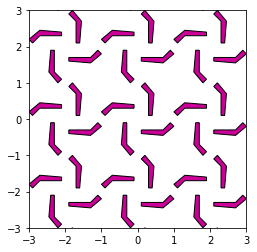

In [98]:
rec1 = Polygon([(0,0),(1, 0), (1,1), (0,1)])
izomgen = izomgen_p6
bx = plt.axes()  
bx.set_xlim(xmin,xmax)
bx.set_xticks(range(xmin,xmax+1))
bx.set_ylim(ymin,ymax)
bx.set_yticks(range(ymin,ymax+1))
bx.set_aspect(1)
#crtaj(izomgen_p4,rec1,bx,'#00FFFF')
crtaj(izomgen_p4,pol,bx,'#CC0099',1)

plt.show()


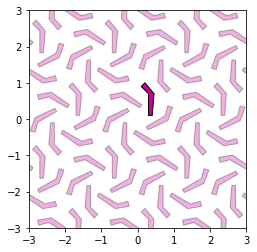

In [50]:
bx = plt.axes()  
bx.set_xlim(xmin,xmax)
bx.set_xticks(range(xmin,xmax+1))
bx.set_ylim(ymin,ymax)
bx.set_yticks(range(ymin,ymax+1))
bx.set_aspect(1)
#crtaj(izomgen,tr,bx,'#00FFAA')
crtaj(izomgen,pol,bx,'#CC0099', 0.3)
crtaj([I],pol,bx,'#CC0099', 1)
plt.show()

In [ ]:
slike = generisi_pol(izomgen,pol)

In [ ]:
def dopuni(izom_gen, pol):
    pol1 = pol
    slike = generisi_pol(izomgen,pol)
    for s in slike:
        if(s.intersects(pol)):
            pol1 = pol.union(s)
    return pol1

In [ ]:
def namesti(ax,xmin,xmax,ymin,ymax):
    ax.set_xlim(xmin,xmax)
    ax.set_xticks(range(xmin,xmax+1))
    ax.set_ylim(ymin,ymax)
    ax.set_yticks(range(ymin,ymax+1))
    ax.set_aspect(1)

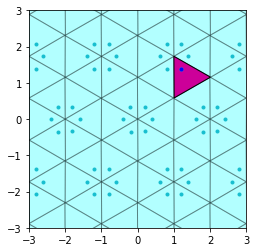

In [48]:
tacke1 = []

A = Point(1.2,1.39)
slike_A = generisi_t(izomgen,A)
tacke1 = [T(s) for s in slike_A]

vor = Voronoi(tacke1)

poli = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[0]]])  
ax = plt.axes()
ax.set_xlim(xmin,xmax)
ax.set_xticks(range(xmin,xmax+1))
ax.set_ylim(ymin,ymax)
ax.set_yticks(range(ymin,ymax+1))
ax.set_aspect(1)


crtaj(izomgen,poli,ax,'#00FFFF')
plt.plot([T(s)[0] for s in slike_A],[T(s)[1] for s in slike_A],'C9.')
plt.plot([A.x],[A.y],'b.')
crtaj([I],poli,ax,'#CC0099',1)
plt.show()


In [ ]:
tacke1 = []

A = Point(1,1)
slike_A = generisi_t(izomgen,A)
tacke1 = [T(s) for s in slike_A]

vor = Voronoi(tacke1)
#fig = voronoi_plot_2d(vor)

poli = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[0]]])  
ax = plt.axes()
ax.set_xlim(xmin,xmax)
ax.set_xticks(range(xmin,xmax+1))
ax.set_ylim(ymin,ymax)
ax.set_yticks(range(ymin,ymax+1))
ax.set_aspect(1)


crtaj(izomgen,poli,ax,'#00FFFF')
plt.plot([T(s)[0] for s in slike_A],[T(s)[1] for s in slike_A],'C9.')
plt.plot([A.x],[A.y],'b.')
crtaj([I],poli,ax,'#CC0099',1)
plt.show()


In [ ]:
tacke1 = []

A = Point(pol.exterior.coords[3])
slike_A = generisi_t(izomgen,A)
tacke1 = [T(s) for s in slike_A]

vor = Voronoi(tacke1)
#fig = voronoi_plot_2d(vor)

poli = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[0]]])  
ax = plt.axes()
ax.set_xlim(xmin,xmax)
ax.set_xticks(range(xmin,xmax+1))
ax.set_ylim(ymin,ymax)
ax.set_yticks(range(ymin,ymax+1))
ax.set_aspect(1)


crtaj(izomgen,poli,ax,'#00FFFF')
plt.plot([T(s)[0] for s in slike_A],[T(s)[1] for s in slike_A],'C9.')
plt.plot([A.x],[A.y],'b.')
crtaj([I],poli,ax,'#CC0099',1)
plt.show()


In [ ]:
tacke1 = []

A = Point(pol.exterior.coords[0])
slike_A = generisi_t(izomgen,A)
tacke1 = [T(s) for s in slike_A]

vor = Voronoi(tacke1)
#fig = voronoi_plot_2d(vor)

poli = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[0]]])  
ax = plt.axes()
ax.set_xlim(xmin,xmax)
ax.set_xticks(range(xmin,xmax+1))
ax.set_ylim(ymin,ymax)
ax.set_yticks(range(ymin,ymax+1))
ax.set_aspect(1)


crtaj(izomgen,poli,ax,'#00FFFF')
plt.plot([T(s)[0] for s in slike_A],[T(s)[1] for s in slike_A],'C9.')
plt.plot([A.x],[A.y],'b.')
crtaj([I],poli,ax,'#CC0099',1)
plt.show()


In [ ]:
tacke2 = []

pol_n=0
A = Point(pol.exterior.coords[0])
B = Point(pol.exterior.coords[3])
slike_A = generisi_t(izomgen,A)
slike_B = generisi_t(izomgen,B)
for i in range(min(len(slike_B),len(slike_A))):
    tacke2.append(T(slike_A[i]))
    tacke2.append(T(slike_B[i]))

vor = Voronoi(tacke2)

pol_A = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[0]]])
pol_B = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[1]]])
pol_U=pol_A.union(pol_B)

ax = plt.axes()
namesti(ax,-3,3,-3,3)

crtaj(izomgen,pol_U,ax,'#00FFFF')
crtaj([I],pol_U,ax,'#CC0099',1)
plt.plot([T(s)[0] for s in slike_A],[T(s)[1] for s in slike_A],'C9.')
plt.plot([T(s)[0] for s in slike_B],[T(s)[1] for s in slike_B],'C1.')
plt.show()


In [ ]:
tacke3 = []
A = Point(pol.exterior.coords[0])
B = Point(pol.exterior.coords[3])
C = Point(pol.exterior.coords[2])
#D = Point(pol.exterior.coords[2])
slike_A = generisi_t(izomgen,A)
slike_B = generisi_t(izomgen,B)
slike_C = generisi_t(izomgen,C)
#slike_D = generisi_t(izomgen,D)
n = min([len(slike_j) for slike_j in [slike_A, slike_B, slike_C]])
for i in range(n):
    tacke3.append(T(slike_A[i]))
    tacke3.append(T(slike_B[i]))
    tacke3.append(T(slike_C[i]))
    #tacke4.append(T(slike_D[i]))

vor = Voronoi(tacke3)

pol_A = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[0]]])
pol_B = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[1]]])
pol_C = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[2]]])
#pol_D = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[2]]])
pol_U=pol_A.union(pol_B).union(pol_C)

ax = plt.axes()
namesti(ax,-3,3,-3,3)



crtaj(izomgen,pol_U,ax,'#00FFFF')
crtaj([I],pol_U,ax,'#CC0099',1)
plt.plot([T(s)[0] for s in slike_A],[T(s)[1] for s in slike_A],'C9.')
plt.plot([T(s)[0] for s in slike_B],[T(s)[1] for s in slike_B],'C1.')
plt.plot([T(s)[0] for s in slike_C],[T(s)[1] for s in slike_C],'C2.')
#plt.plot([T(s)[0] for s in slike_D],[T(s)[1] for s in slike_D],'C0.')
plt.show()

In [ ]:
ax = plt.axes()
namesti(ax,-3,3,-3,3)
crtaj([I],pol_U,ax,'#0000FF',0.7)


crtaj(izomgen,pol_U,ax,'#00FFFF')
crtaj([I], pol,ax,'#0000FF',1)
crtaj([I],pol_U,ax,'#CC0099',1)
crtaj([I], pol,ax,'#0000FF',0.2)
crtaj(izomgen, pol,ax,'#0000FF',0.2)
plt.plot([t[0] for t in tacke3],[t[1] for t in tacke3],'C0.')
plt.show()

In [ ]:
tacke4 = []
A = Point(pol.exterior.coords[3])
B = Point(pol.centroid)
C = Point(pol.exterior.coords[1])
D = Point(pol.exterior.coords[2])
slike_A = generisi_t(izomgen,A)
slike_B = generisi_t(izomgen,B)
slike_C = generisi_t(izomgen,C)
slike_D = generisi_t(izomgen,D)
n = min([len(slike_j) for slike_j in [slike_A, slike_B, slike_C, slike_D]])
for i in range(n):
    tacke4.append(T(slike_A[i]))
    tacke4.append(T(slike_B[i]))
    tacke4.append(T(slike_C[i]))
    tacke4.append(T(slike_D[i]))

vor = Voronoi(tacke4)

pol_A = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[0]]])
pol_B = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[1]]])
pol_C = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[3]]])
pol_D = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[2]]])
pol_U=pol_A.union(pol_B).union(pol_C).union(pol_D)

ax = plt.axes()
namesti(ax,-3,3,-3,3)



crtaj(izomgen,pol_U,ax,'#00FFFF')
crtaj([I],pol_U,ax,'#CC0099',1)
plt.plot([T(s)[0] for s in slike_A],[T(s)[1] for s in slike_A],'C1.')
plt.plot([T(s)[0] for s in slike_B],[T(s)[1] for s in slike_B],'C9.')
plt.plot([T(s)[0] for s in slike_C],[T(s)[1] for s in slike_C],'C8.')
plt.plot([T(s)[0] for s in slike_D],[T(s)[1] for s in slike_D],'C2.')
plt.show()

In [ ]:
ax = plt.axes()
namesti(ax,-3,3,-3,3)
crtaj([I],pol_U,ax,'#0000FF',0.7)


crtaj(izomgen,pol_U,ax,'#00FFFF')
crtaj([I], pol,ax,'#0000FF',1)
crtaj([I],pol_U,ax,'#CC0099',1)
crtaj([I], pol,ax,'#0000FF',0.2)
crtaj(izomgen, pol,ax,'#0000FF',0.2)
plt.plot([t[0] for t in tacke4],[t[1] for t in tacke4],'C0.')
plt.show()

In [ ]:

M = [Point(p) for p in pol.exterior.coords]
x0,y0 = pol.exterior.coords[0]
d=1
for i in range(1,len(pol.exterior.coords)):
    x1,y1 = pol.exterior.coords[i]
    for k in np.arange(0,1,1.0/d):
        M.append(Point((1-k)*x0+k*x1, (1-k)*y0+k*y1))        
    x0,y0 = x1,y1
    
M.append(Point(pol.centroid))
slike_M = [generisi_t(izomgen,A) for A in M]
tacke_n=[]
n = min([len(slike_j) for slike_j in slike_M])

for i in range(n):
    for s in [T(slike_j[i]) for slike_j in slike_M]:
        tacke_n.append(s)
vor = Voronoi(tacke_n)

pol_U = Polygon()
for i in range(len(M)):
    pol_I = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[i]]])
    pol_U = pol_U.union(pol_I)

ax = plt.axes()
namesti(ax,-3,3,-3,3)
plt.plot([t[0] for t in tacke_n],[t[1] for t in tacke_n],'C0.')
sve_slike.append([izomgen, pol_U,pol])

crtaj(izomgen,pol_U,ax,'#00FFFF')
crtaj([I],pol_U,ax,'#CC0099',1)
crtaj(izomgen, pol,ax,'#0000FF',0.2)
#crtaj([I], pol,ax,'#0000FF',1)
plt.show()

In [ ]:

M = [Point(p) for p in pol.exterior.coords]
x0,y0 = pol.exterior.coords[0]
d=2
for i in range(1,len(pol.exterior.coords)):
    x1,y1 = pol.exterior.coords[i]
    for k in np.arange(0,1,1.0/d):
        M.append(Point((1-k)*x0+k*x1, (1-k)*y0+k*y1))        
    x0,y0 = x1,y1
    
M.append(Point(pol.centroid))
slike_M = [generisi_t(izomgen,A) for A in M]
tacke_n=[]
n = min([len(slike_j) for slike_j in slike_M])

for i in range(n):
    for s in [T(slike_j[i]) for slike_j in slike_M]:
        tacke_n.append(s)
vor = Voronoi(tacke_n)

pol_U = Polygon()
for i in range(len(M)):
    pol_I = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[i]]])
    pol_U = pol_U.union(pol_I)

ax = plt.axes()
namesti(ax,-3,3,-3,3)
plt.plot([t[0] for t in tacke_n],[t[1] for t in tacke_n],'C0.')
sve_slike.append([izomgen, pol_U,pol])

crtaj(izomgen,pol_U,ax,'#00FFFF')
crtaj([I],pol_U,ax,'#CC0099',1)
crtaj(izomgen, pol,ax,'#0000FF',0.2)
#crtaj([I], pol,ax,'#0000FF',1)
plt.show()

In [ ]:
M = [Point(p) for p in pol.exterior.coords]
x0,y0 = pol.exterior.coords[0]
d=50
for i in range(1,len(pol.exterior.coords)):
    x1,y1 = pol.exterior.coords[i]
    for k in np.arange(0,1,1.0/d):
        M.append(Point((1-k)*x0+k*x1, (1-k)*y0+k*y1))        
    x0,y0 = x1,y1
    
M.append(Point(pol.centroid))
slike_M = [generisi_t(izomgen,A) for A in M]
tacke_n=[]
n = min([len(slike_j) for slike_j in slike_M])

for i in range(n):
    for s in [T(slike_j[i]) for slike_j in slike_M]:
        tacke_n.append(s)
vor = Voronoi(tacke_n)

pol_U = Polygon()
for i in range(len(M)):
    pol_I = Polygon([vor.vertices[p] for p in vor.regions[vor.point_region[i]]])
    pol_U = pol_U.union(pol_I)

ax = plt.axes()
namesti(ax,-3,3,-3,3)
#plt.plot([t[0] for t in tacke_n],[t[1] for t in tacke_n],'C0.')
sve_slike.append([izomgen, pol_U,pol])

crtaj(izomgen,pol_U,ax,'#00FFFF')
crtaj([I],pol_U,ax,'#CC0099',1)
crtaj(izomgen, pol,ax,'#0000FF',0.2)
crtaj([I], pol,ax,'#0000FF',1)
plt.show()

In [ ]:
for s in sve_slike:
    ax = plt.axes()
    namesti(ax,-3,3,-3,3)
    crtaj(s[0],s[1],ax,'#00FFFF')
    crtaj([I],s[1],ax,'#CC0099',1)
    crtaj(s[0], s[2],ax,'#0000FF',0.2)
    crtaj([I], s[2],ax,'#0000FF',1)
    plt.show()